In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("Libraries imported successfully!")

Libraries imported successfully!


In [9]:
os.chdir("E:\job\shopify_trending_product_analysis")
df = pd.read_csv("data/raw/shopify_trending_products_2025.csv")

print("✅ Data loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of products: {len(df)}")

# Show first few rows
print("\n📋 First 5 rows:")
display(df.head())

✅ Data loaded successfully!
Dataset shape: (1000, 10)
Number of products: 1000

📋 First 5 rows:


,Product_ID,Product_Name,Category,Subcategory,Estimated_Total_Units_Sold_in_2025,Estimated_Revenue_in_2025_USD,Price_Range_USD,Trend_Score,Trend_Source,Notes
0,PROD-2025-0001,Loaded Tea At-Home Beverage Pack,Food & Beverage,Beverages,1651289,4953867.0,$3.0-$4,99.6,TikTok Shop Viral,Verified top seller in 2025 ecommerce reports.
1,PROD-2025-0002,Protein Coffee On-The-Go Energy Drink,Food & Beverage,Beverages,1466551,4399653.0,$3.0-$4,96.9,TikTok Shop Viral,Verified top seller in 2025 ecommerce reports.
2,PROD-2025-0003,Whitening Strips 7-Day Treatment,Beauty & Skincare,Personal Care,953072,10483792.0,$11.0-$16,95.7,TikTok Shop Viral,Verified top seller in 2025 ecommerce reports.
3,PROD-2025-0004,5-1 Full Body Shaver,Beauty & Skincare,Personal Care Gadgets,509346,22920570.0,$45.0-$68,97.5,Shopify Trending List,Verified top seller in 2025 ecommerce reports.
4,PROD-2025-0005,Newborn Training Pants Baby Shorts,Baby,Organic Baby Clothing,835510,12532650.0,$15.0-$22,95.2,Shopify Trending List,Verified top seller in 2025 ecommerce reports.


In [10]:
# Basic Data Information

print("📊 Dataset Information:")
print(df.info())

print("\n🔍 Missing Values:")
missing = df.isnull().sum()
print(missing[missing > 0])

print("\n📈 Basic Statistics:")
print(df.describe())

📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Product_ID                          1000 non-null   object 
 1   Product_Name                        1000 non-null   object 
 2   Category                            1000 non-null   object 
 3   Subcategory                         1000 non-null   object 
 4   Estimated_Total_Units_Sold_in_2025  1000 non-null   int64  
 5   Estimated_Revenue_in_2025_USD       1000 non-null   float64
 6   Price_Range_USD                     1000 non-null   object 
 7   Trend_Score                         1000 non-null   float64
 8   Trend_Source                        1000 non-null   object 
 9   Notes                               1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.3+ KB
None

🔍 Missing Values:
Seri

📁 Plots will be saved to 'visualizations' folder
🔄 Extracting price information...
✅ Price data cleaned successfully!
Average product price: $104.71
Cheapest product: $3.00
Most expensive product: $243.00
Average price range width: $51.08

📊 VISUALIZATION SHOWCASE - PRICE ANALYSIS


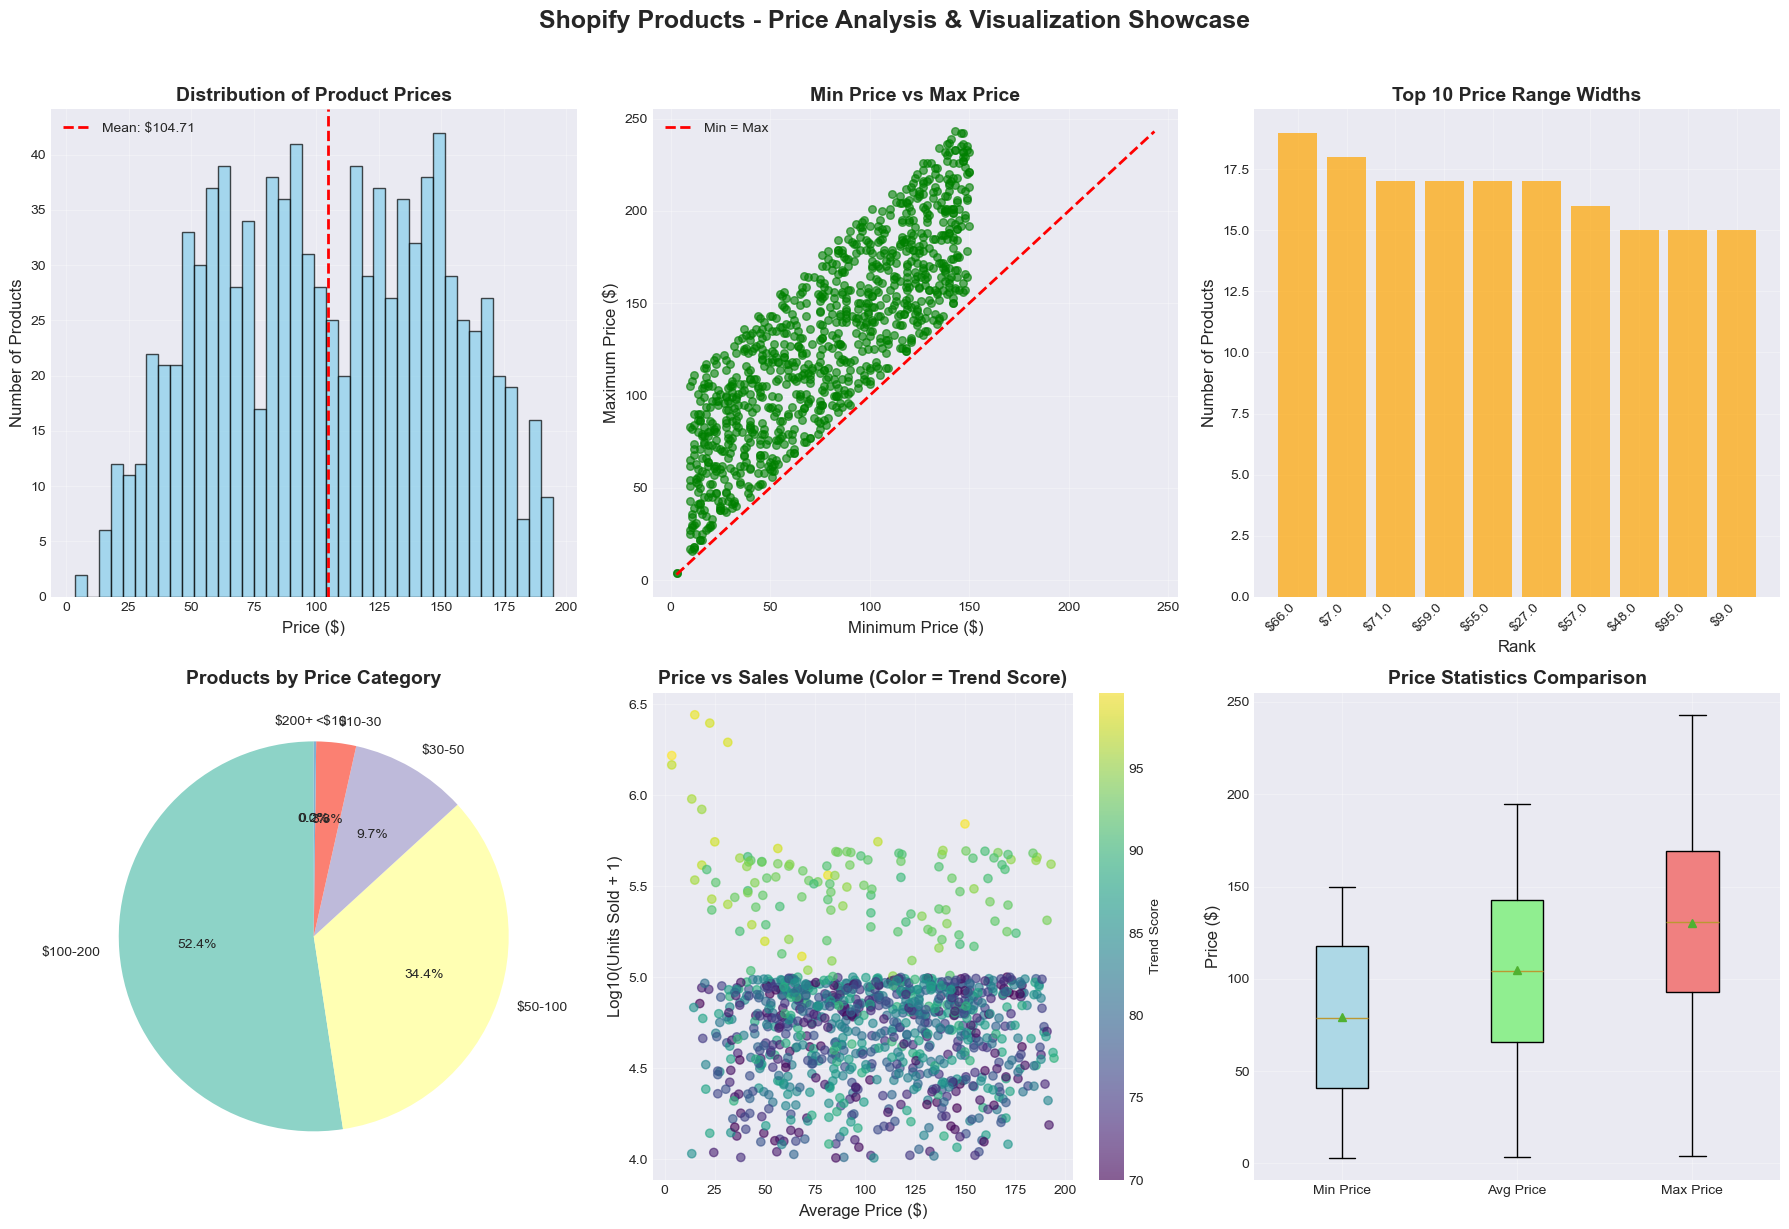


💾 Visualization saved as 'visualizations\price_analysis_showcase.png'

📌 PRICE ANALYSIS INSIGHTS:
1. 0 products (0.0%) have fixed prices (no range)
2. Most common price range width: $66.00
3. Price category distribution:
   • $100-200: 524 products (52.4%)
   • $50-100: 344 products (34.4%)
   • $30-50: 97 products (9.7%)
   • $10-30: 33 products (3.3%)
   • <$10: 2 products (0.2%)
   • $200+: 0 products (0.0%)


<Figure size 640x480 with 0 Axes>

In [13]:
# Cell 4: Data Cleaning - Extract Price Information & Basic Visualization
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Create directory for saving plots if it doesn't exist
plots_dir = 'visualizations'
os.makedirs(plots_dir, exist_ok=True)
print(f"📁 Plots will be saved to '{plots_dir}' folder")

def clean_price(price_str):
    """Extract min and max price from price range string"""
    try:
        price_str = str(price_str).replace('$', '').strip()
        if '-' in price_str:
            parts = price_str.split('-')
            min_price = float(parts[0])
            max_price = float(parts[1])
        else:
            min_price = max_price = float(price_str)
        return min_price, max_price
    except:
        return np.nan, np.nan

# Apply cleaning function
print("🔄 Extracting price information...")
price_data = df['Price_Range_USD'].apply(clean_price)
df['Price_Min'] = price_data.apply(lambda x: x[0])
df['Price_Max'] = price_data.apply(lambda x: x[1])
df['Price_Avg'] = (df['Price_Min'] + df['Price_Max']) / 2
df['Price_Range_Width'] = df['Price_Max'] - df['Price_Min']

print("✅ Price data cleaned successfully!")
print(f"Average product price: ${df['Price_Avg'].mean():.2f}")
print(f"Cheapest product: ${df['Price_Min'].min():.2f}")
print(f"Most expensive product: ${df['Price_Max'].max():.2f}")
print(f"Average price range width: ${df['Price_Range_Width'].mean():.2f}")

# Create a temporary success metric just for this visualization
# We'll create the proper Success_Score in Cell 5
df['Temp_Success'] = df['Trend_Score'] / 100

# VISUALIZATION SHOWCASE
print("\n" + "="*50)
print("📊 VISUALIZATION SHOWCASE - PRICE ANALYSIS")
print("="*50)

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Price Distribution
axes[0, 0].hist(df['Price_Avg'], bins=40, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['Price_Avg'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["Price_Avg"].mean():.2f}')
axes[0, 0].set_title('Distribution of Product Prices', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Price ($)', fontsize=12)
axes[0, 0].set_ylabel('Number of Products', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Min vs Max Price Scatter
axes[0, 1].scatter(df['Price_Min'], df['Price_Max'], alpha=0.6, color='green', s=30)
axes[0, 1].plot([df['Price_Min'].min(), df['Price_Max'].max()], 
                [df['Price_Min'].min(), df['Price_Max'].max()], 
                'r--', linewidth=2, label='Min = Max')
axes[0, 1].set_title('Min Price vs Max Price', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Minimum Price ($)', fontsize=12)
axes[0, 1].set_ylabel('Maximum Price ($)', fontsize=12)
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Price Range Width Distribution
price_ranges = df['Price_Range_Width'].value_counts().head(10)
axes[0, 2].bar(range(len(price_ranges)), price_ranges.values, color='orange', alpha=0.7)
axes[0, 2].set_title('Top 10 Price Range Widths', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Rank', fontsize=12)
axes[0, 2].set_ylabel('Number of Products', fontsize=12)
axes[0, 2].set_xticks(range(len(price_ranges)))
axes[0, 2].set_xticklabels([f'${val:.1f}' for val in price_ranges.index], rotation=45, ha='right')
axes[0, 2].grid(alpha=0.3)

# 4. Price Category Pie Chart
df['Price_Category'] = pd.cut(df['Price_Avg'], 
                              bins=[0, 10, 30, 50, 100, 200, 500],
                              labels=['<$10', '$10-30', '$30-50', '$50-100', '$100-200', '$200+'])
price_categories = df['Price_Category'].value_counts()
axes[1, 0].pie(price_categories.values, labels=price_categories.index, 
               autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
axes[1, 0].set_title('Products by Price Category', fontsize=14, fontweight='bold')

# 5. Price vs Units Sold (Color by Trend Score)
log_units = np.log10(df['Estimated_Total_Units_Sold_in_2025'] + 1)
scatter = axes[1, 1].scatter(df['Price_Avg'], log_units, 
                            c=df['Trend_Score'], 
                            alpha=0.6, 
                            cmap='viridis')
axes[1, 1].set_title('Price vs Sales Volume (Color = Trend Score)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Average Price ($)', fontsize=12)
axes[1, 1].set_ylabel('Log10(Units Sold + 1)', fontsize=12)
axes[1, 1].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 1], label='Trend Score')

# 6. Price Statistics Box Plot
price_stats_data = [df['Price_Min'], df['Price_Avg'], df['Price_Max']]
box = axes[1, 2].boxplot(price_stats_data, labels=['Min Price', 'Avg Price', 'Max Price'], 
                         patch_artist=True, showmeans=True)
# Color the boxes
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
axes[1, 2].set_title('Price Statistics Comparison', fontsize=14, fontweight='bold')
axes[1, 2].set_ylabel('Price ($)', fontsize=12)
axes[1, 2].grid(alpha=0.3)

plt.suptitle('Shopify Products - Price Analysis & Visualization Showcase', 
             fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Save the visualization
plot_path = os.path.join(plots_dir, 'price_analysis_showcase.png')
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"\n💾 Visualization saved as '{plot_path}'")

# Additional insights
print("\n📌 PRICE ANALYSIS INSIGHTS:")
print(f"1. {len(df[df['Price_Min'] == df['Price_Max']])} products ({len(df[df['Price_Min'] == df['Price_Max']])/len(df)*100:.1f}%) have fixed prices (no range)")
print(f"2. Most common price range width: ${df['Price_Range_Width'].mode()[0]:.2f}" if len(df['Price_Range_Width'].mode()) > 0 else "")
print(f"3. Price category distribution:")
for category in price_categories.index:
    count = price_categories[category]
    percentage = (count / len(df)) * 100
    print(f"   • {category}: {count} products ({percentage:.1f}%)")

# Remove temporary column
df.drop('Temp_Success', axis=1, inplace=True, errors='ignore')

In [15]:
# Useful Features
# Calculate revenue per unit
df['Revenue_Per_Unit'] = df['Estimated_Revenue_in_2025_USD'] / df['Estimated_Total_Units_Sold_in_2025']

# simple categories
df['Price_Category'] = pd.cut(df['Price_Avg'], 
                               bins=[0, 20, 50, 100, 500],
                               labels=['Budget', 'Mid-Range', 'Premium', 'Luxury'])

# success score (simplified version)
df['Success_Score'] = (df['Trend_Score'] / 100) * 0.5 + \
                      (df['Estimated_Total_Units_Sold_in_2025'] / df['Estimated_Total_Units_Sold_in_2025'].max()) * 0.5

print("✅ New features created!")
print(f"Success Score range: {df['Success_Score'].min():.3f} - {df['Success_Score'].max():.3f}")
print(f"Revenue per unit range: ${df['Revenue_Per_Unit'].min():.2f} - ${df['Revenue_Per_Unit'].max():.2f}")

✅ New features created!
Success Score range: 0.353 - 0.993
Revenue per unit range: $3.00 - $194.50



🎨 ADDITIONAL VISUALIZATIONS SHOWCASE


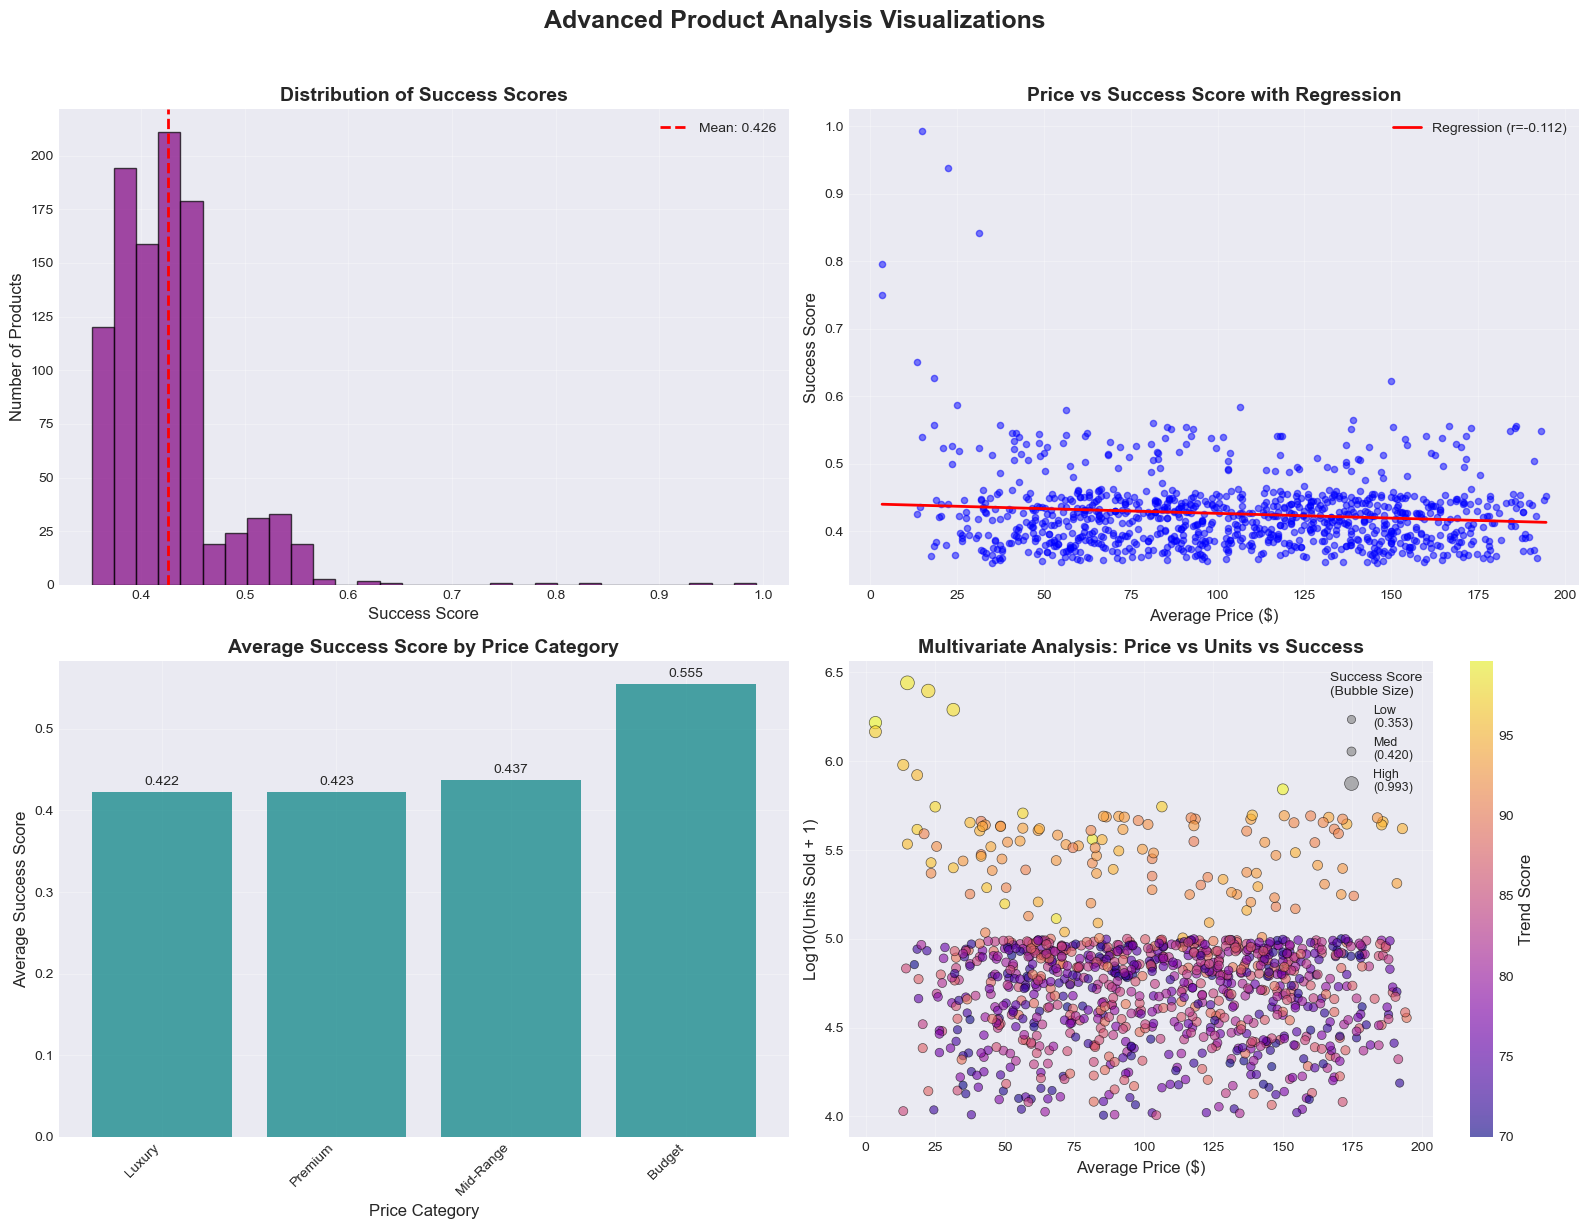


💾 Advanced visualization saved as 'visualizations\advanced_analysis_showcase.png'


<Figure size 640x480 with 0 Axes>

In [16]:
#  Additional Visualizations 
print("\n" + "="*50)
print("🎨 ADDITIONAL VISUALIZATIONS SHOWCASE")
print("="*50)

# Create another figure for advanced visualizations
fig2, axes2 = plt.subplots(2, 2, figsize=(16, 12))

# 1. Success Score Distribution
axes2[0, 0].hist(df['Success_Score'], bins=30, color='purple', edgecolor='black', alpha=0.7)
axes2[0, 0].axvline(df['Success_Score'].mean(), color='red', linestyle='--', linewidth=2, 
                   label=f'Mean: {df["Success_Score"].mean():.3f}')
axes2[0, 0].set_title('Distribution of Success Scores', fontsize=14, fontweight='bold')
axes2[0, 0].set_xlabel('Success Score', fontsize=12)
axes2[0, 0].set_ylabel('Number of Products', fontsize=12)
axes2[0, 0].legend()
axes2[0, 0].grid(alpha=0.3)

# 2. Price vs Success Score with Regression Line
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Price_Avg'], df['Success_Score'])
x_line = np.linspace(df['Price_Avg'].min(), df['Price_Avg'].max(), 100)
y_line = slope * x_line + intercept

axes2[0, 1].scatter(df['Price_Avg'], df['Success_Score'], alpha=0.5, color='blue', s=20)
axes2[0, 1].plot(x_line, y_line, 'r-', linewidth=2, 
                label=f'Regression (r={r_value:.3f})')
axes2[0, 1].set_title('Price vs Success Score with Regression', fontsize=14, fontweight='bold')
axes2[0, 1].set_xlabel('Average Price ($)', fontsize=12)
axes2[0, 1].set_ylabel('Success Score', fontsize=12)
axes2[0, 1].legend()
axes2[0, 1].grid(alpha=0.3)

# 3. Success by Price Category
success_by_price = df.groupby('Price_Category')['Success_Score'].mean().sort_values()
axes2[1, 0].bar(range(len(success_by_price)), success_by_price.values, color='teal', alpha=0.7)
axes2[1, 0].set_title('Average Success Score by Price Category', fontsize=14, fontweight='bold')
axes2[1, 0].set_xlabel('Price Category', fontsize=12)
axes2[1, 0].set_ylabel('Average Success Score', fontsize=12)
axes2[1, 0].set_xticks(range(len(success_by_price)))
axes2[1, 0].set_xticklabels(success_by_price.index, rotation=45, ha='right')
axes2[1, 0].grid(alpha=0.3)

# Add value labels on bars
for i, v in enumerate(success_by_price.values):
    axes2[1, 0].text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontsize=10)

# 4. Bubble Chart: Price vs Units Sold vs Success
log_units = np.log10(df['Estimated_Total_Units_Sold_in_2025'] + 1)
bubble_sizes = df['Success_Score'] * 100  # Scale for better visualization

scatter2 = axes2[1, 1].scatter(df['Price_Avg'], log_units, 
                              s=bubble_sizes,  # Bubble size based on success
                              c=df['Trend_Score'],  # Color based on trend score
                              alpha=0.6, 
                              cmap='plasma',
                              edgecolors='black', linewidth=0.5)
axes2[1, 1].set_title('Multivariate Analysis: Price vs Units vs Success', fontsize=14, fontweight='bold')
axes2[1, 1].set_xlabel('Average Price ($)', fontsize=12)
axes2[1, 1].set_ylabel('Log10(Units Sold + 1)', fontsize=12)
axes2[1, 1].grid(alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter2, ax=axes2[1, 1])
cbar.set_label('Trend Score', fontsize=12)

# Add legend for bubble sizes
success_min = df['Success_Score'].min()
success_max = df['Success_Score'].max()
legend_sizes = [success_min * 100, np.median(df['Success_Score']) * 100, success_max * 100]
legend_labels = [f'Low\n({success_min:.3f})', f'Med\n({np.median(df["Success_Score"]):.3f})', f'High\n({success_max:.3f})']

for size, label in zip(legend_sizes, legend_labels):
    axes2[1, 1].scatter([], [], s=size, c='gray', alpha=0.6, edgecolors='black', 
                       linewidth=0.5, label=label)
axes2[1, 1].legend(title='Success Score\n(Bubble Size)', loc='upper right', 
                  framealpha=0.8, fontsize=9)

plt.suptitle('Advanced Product Analysis Visualizations', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Save the advanced visualization
plot_path2 = os.path.join(plots_dir, 'advanced_analysis_showcase.png')
plt.savefig(plot_path2, dpi=300, bbox_inches='tight')
print(f"\n💾 Advanced visualization saved as '{plot_path2}'")

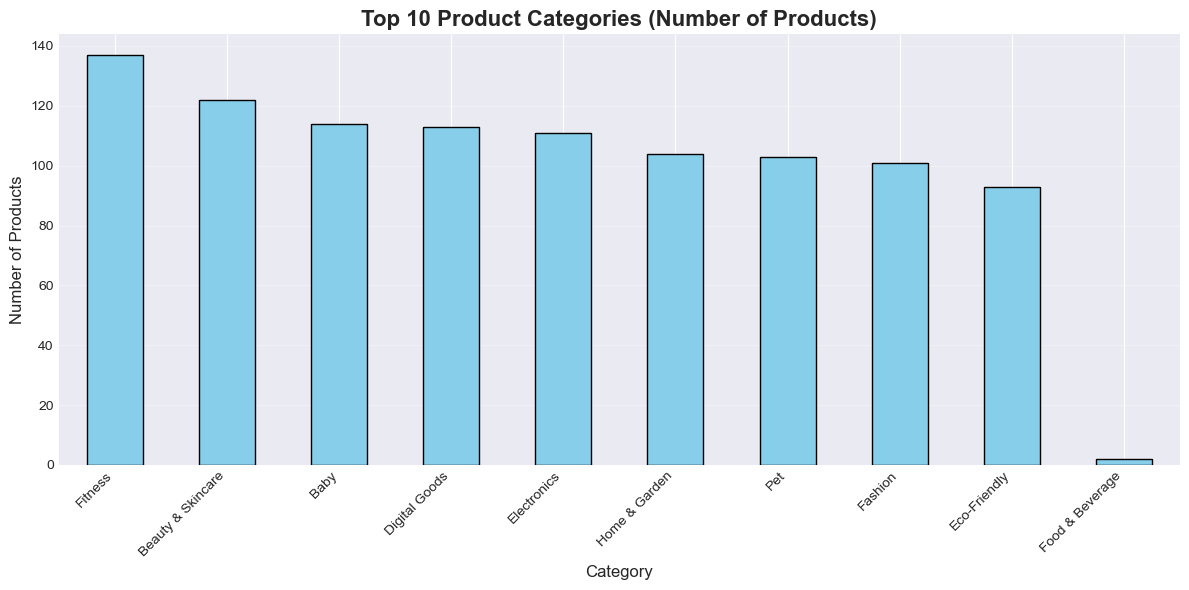

🏆 Top 5 Categories:
1. Fitness: 137 products
2. Beauty & Skincare: 122 products
3. Baby: 114 products
4. Digital Goods: 113 products
5. Electronics: 111 products


In [17]:
#  What are the top categories?
top_categories = df['Category'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Product Categories (Number of Products)', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("🏆 Top 5 Categories:")
for i, (cat, count) in enumerate(top_categories.head().items(), 1):
    print(f"{i}. {cat}: {count} products")

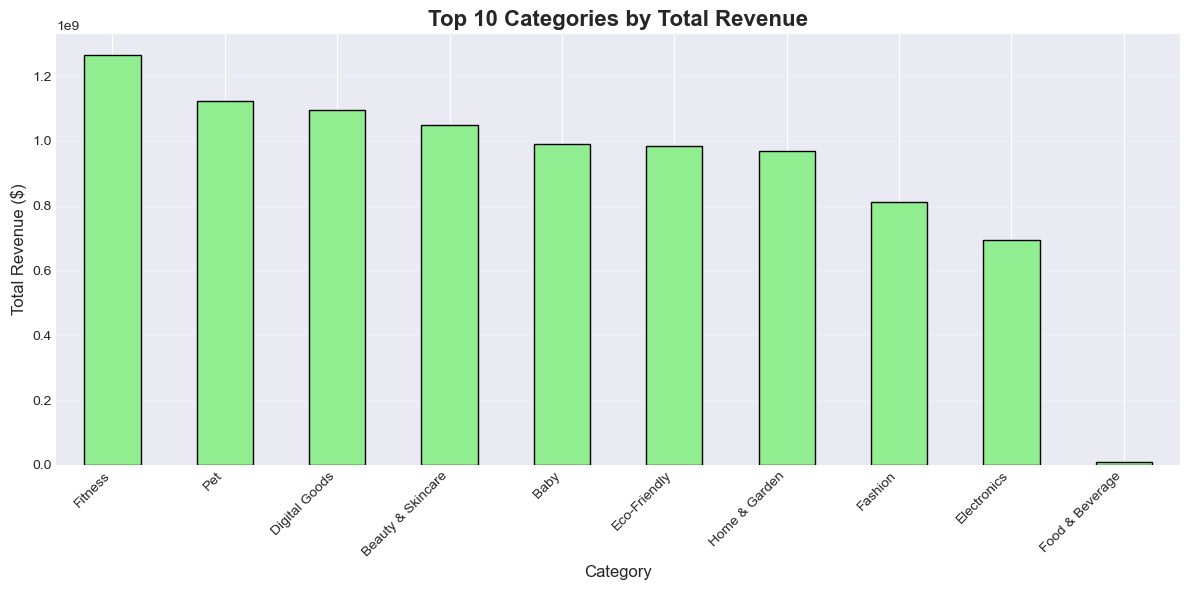

💰 Top 5 Revenue-Generating Categories:
1. Fitness: $1,265,127,191
2. Pet: $1,121,737,589
3. Digital Goods: $1,093,895,072
4. Beauty & Skincare: $1,048,243,954
5. Baby: $989,908,648


In [18]:
#  Which categories make the most revenue?
category_revenue = df.groupby('Category')['Estimated_Revenue_in_2025_USD'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
category_revenue.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Categories by Total Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("💰 Top 5 Revenue-Generating Categories:")
for i, (cat, revenue) in enumerate(category_revenue.head().items(), 1):
    print(f"{i}. {cat}: ${revenue:,.0f}")

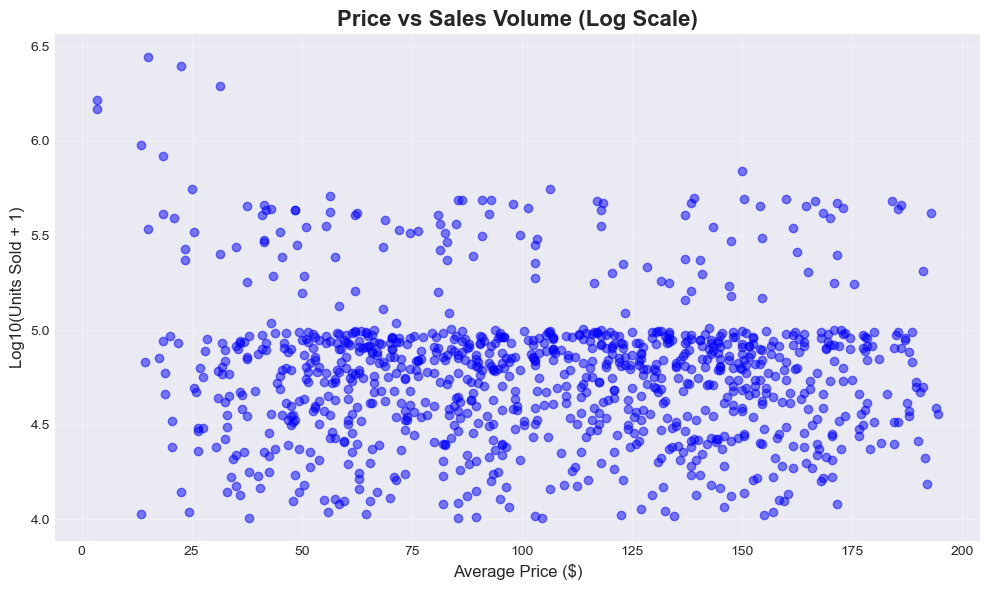

📈 Correlation between price and sales (log): -0.065
   → Weak correlation: Price doesn't strongly affect sales


In [19]:
#  How does price affect sales?
plt.figure(figsize=(10, 6))
plt.scatter(df['Price_Avg'], 
           np.log10(df['Estimated_Total_Units_Sold_in_2025'] + 1), 
           alpha=0.5, c='blue')
plt.title('Price vs Sales Volume (Log Scale)', fontsize=16, fontweight='bold')
plt.xlabel('Average Price ($)', fontsize=12)
plt.ylabel('Log10(Units Sold + 1)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = df['Price_Avg'].corr(np.log10(df['Estimated_Total_Units_Sold_in_2025'] + 1))
print(f"📈 Correlation between price and sales (log): {correlation:.3f}")

if correlation < -0.3:
    print("   → Strong negative correlation: Higher prices mean fewer sales")
elif correlation < -0.1:
    print("   → Moderate negative correlation: Price affects sales somewhat")
elif correlation < 0.1:
    print("   → Weak correlation: Price doesn't strongly affect sales")
else:
    print("   → Positive correlation: Higher prices correlate with more sales")

📊 Performance by Price Category:


,Trend_Score,Estimated_Total_Units_Sold_in_2025,Estimated_Revenue_in_2025_USD,Success_Score
Price_Category,,,,
Budget,88.11,632952.00,5978012.71,0.56
Mid-Range,82.43,138704.69,4550009.72,0.44
Premium,81.49,83256.15,6233804.42,0.42
Luxury,81.46,83498.52,11872921.06,0.42


<Figure size 1000x600 with 0 Axes>

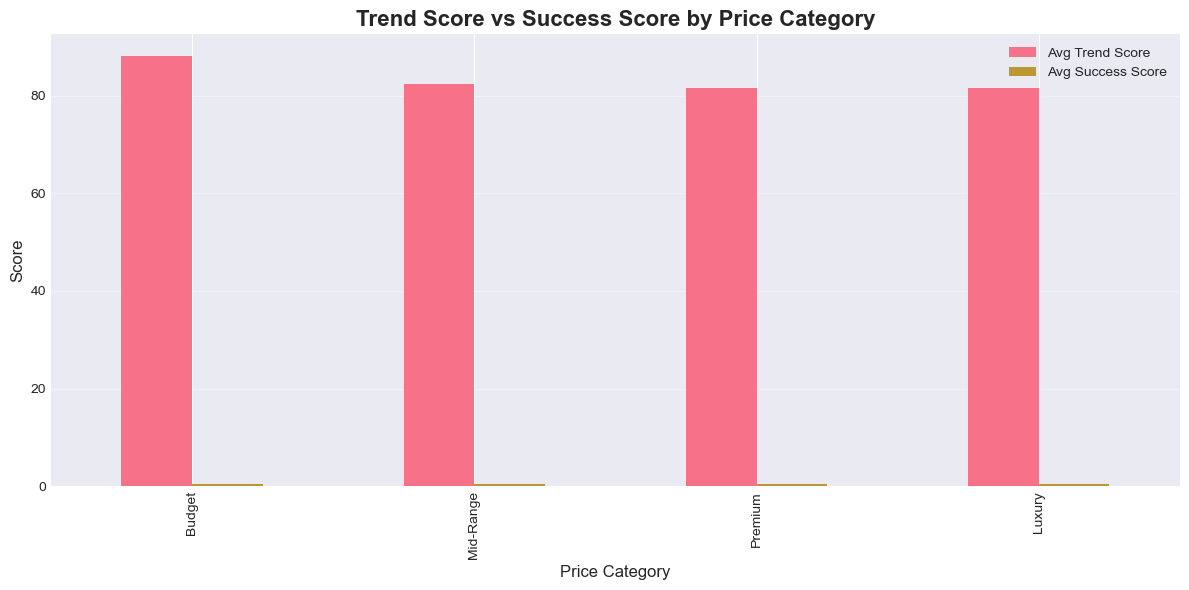

In [20]:
#  Which price categories perform best?
price_performance = df.groupby('Price_Category').agg({
    'Trend_Score': 'mean',
    'Estimated_Total_Units_Sold_in_2025': 'mean',
    'Estimated_Revenue_in_2025_USD': 'mean',
    'Success_Score': 'mean'
}).round(2)

print("📊 Performance by Price Category:")
display(price_performance)

plt.figure(figsize=(10, 6))
price_performance[['Trend_Score', 'Success_Score']].plot(kind='bar', figsize=(12, 6))
plt.title('Trend Score vs Success Score by Price Category', fontsize=16, fontweight='bold')
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend(['Avg Trend Score', 'Avg Success Score'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

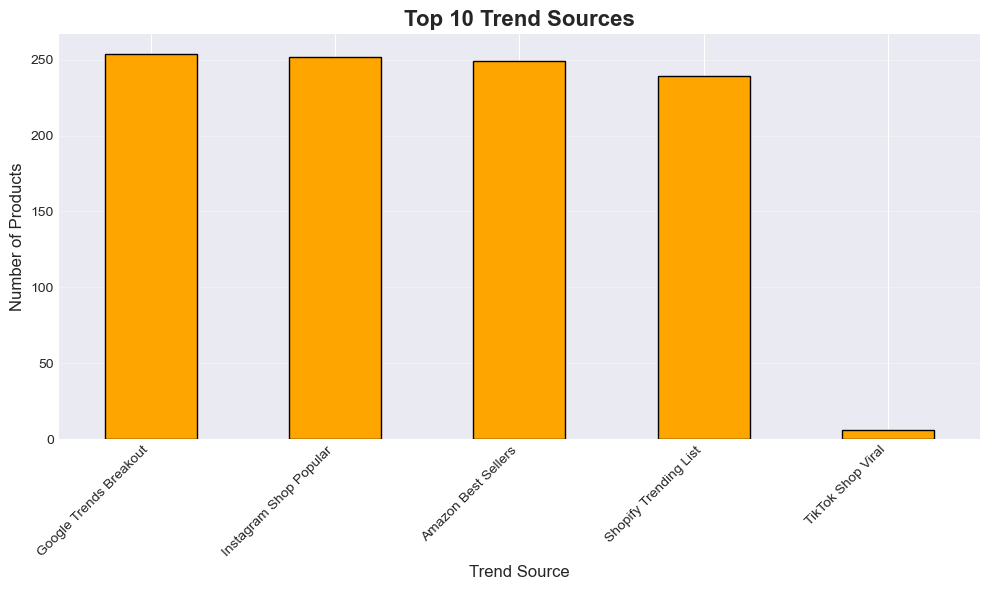

🔥 Top Trend Sources:
1. Google Trends Breakout: 254 products
2. Instagram Shop Popular: 252 products
3. Amazon Best Sellers: 249 products
4. Shopify Trending List: 239 products
5. TikTok Shop Viral: 6 products


In [21]:
# Where do trends come from?
trend_sources = df['Trend_Source'].value_counts().head(10)

plt.figure(figsize=(10, 6))
trend_sources.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Trend Sources', fontsize=16, fontweight='bold')
plt.xlabel('Trend Source', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("🔥 Top Trend Sources:")
for i, (source, count) in enumerate(trend_sources.head().items(), 1):
    print(f"{i}. {source}: {count} products")

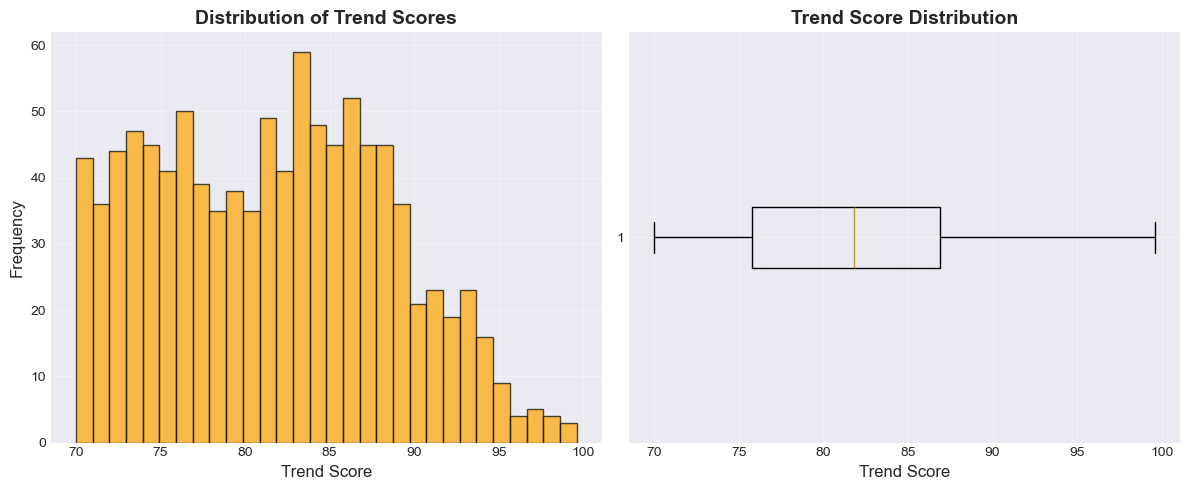

📊 Trend Score Statistics:
• Average: 81.7
• Median: 81.8
• Minimum: 70.0
• Maximum: 99.6
• Standard Deviation: 6.9


In [22]:
# What's the distribution of trend scores?
plt.figure(figsize=(12, 5))

# Plot 1: Histogram
plt.subplot(1, 2, 1)
plt.hist(df['Trend_Score'], bins=30, edgecolor='black', alpha=0.7, color='orange')
plt.title('Distribution of Trend Scores', fontsize=14, fontweight='bold')
plt.xlabel('Trend Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)

# Plot 2: Box plot
plt.subplot(1, 2, 2)
plt.boxplot(df['Trend_Score'], vert=False)
plt.title('Trend Score Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Trend Score', fontsize=12)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Trend Score Statistics:")
print(f"• Average: {df['Trend_Score'].mean():.1f}")
print(f"• Median: {df['Trend_Score'].median():.1f}")
print(f"• Minimum: {df['Trend_Score'].min():.1f}")
print(f"• Maximum: {df['Trend_Score'].max():.1f}")
print(f"• Standard Deviation: {df['Trend_Score'].std():.1f}")

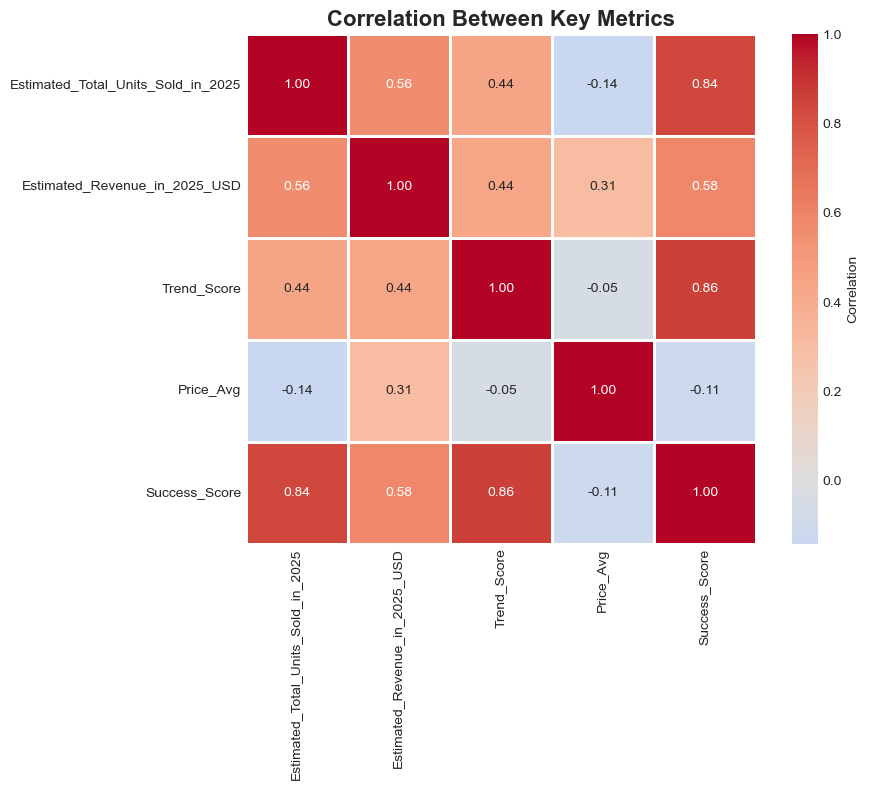

🔗 Key Correlations:
1. Revenue & Units Sold: 0.558
2. Trend Score & Success: 0.861
3. Price & Units Sold: -0.142
4. Price & Revenue: 0.308


In [23]:
#  Correlation Analysis
numeric_cols = ['Estimated_Total_Units_Sold_in_2025', 
                'Estimated_Revenue_in_2025_USD', 
                'Trend_Score', 
                'Price_Avg',
                'Success_Score']

correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Between Key Metrics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("🔗 Key Correlations:")
print(f"1. Revenue & Units Sold: {correlation_matrix.loc['Estimated_Revenue_in_2025_USD', 'Estimated_Total_Units_Sold_in_2025']:.3f}")
print(f"2. Trend Score & Success: {correlation_matrix.loc['Trend_Score', 'Success_Score']:.3f}")
print(f"3. Price & Units Sold: {correlation_matrix.loc['Price_Avg', 'Estimated_Total_Units_Sold_in_2025']:.3f}")
print(f"4. Price & Revenue: {correlation_matrix.loc['Price_Avg', 'Estimated_Revenue_in_2025_USD']:.3f}")

In [24]:
# Prepare Data for Machine Learning
# Select features for prediction
features = ['Price_Avg', 'Trend_Score', 'Estimated_Total_Units_Sold_in_2025']
target = 'Success_Score'

# Remove any missing values
ml_data = df[features + [target]].dropna()

X = ml_data[features]
y = ml_data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data prepared for machine learning!")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Features used: {', '.join(features)}")

✅ Data prepared for machine learning!
Training set: 800 samples
Testing set: 200 samples
Features used: Price_Avg, Trend_Score, Estimated_Total_Units_Sold_in_2025


🤖 Model Training Complete!
Mean Squared Error: 0.0000
R² Score: 0.9992
→ This means the model explains 99.9% of the variance in Success Score


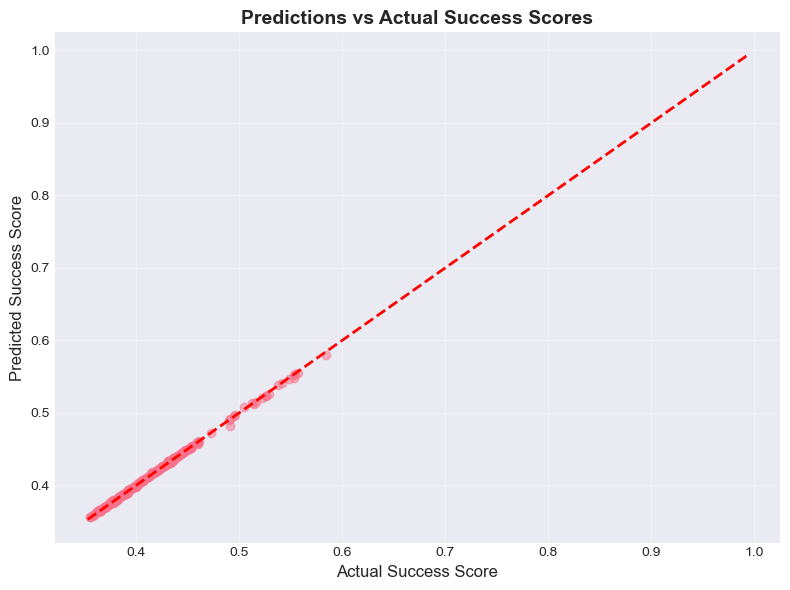

In [25]:
# Train a Simple Prediction Model
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🤖 Model Training Complete!")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"→ This means the model explains {r2*100:.1f}% of the variance in Success Score")

# Compare predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Predictions vs Actual Success Scores', fontsize=14, fontweight='bold')
plt.xlabel('Actual Success Score', fontsize=12)
plt.ylabel('Predicted Success Score', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

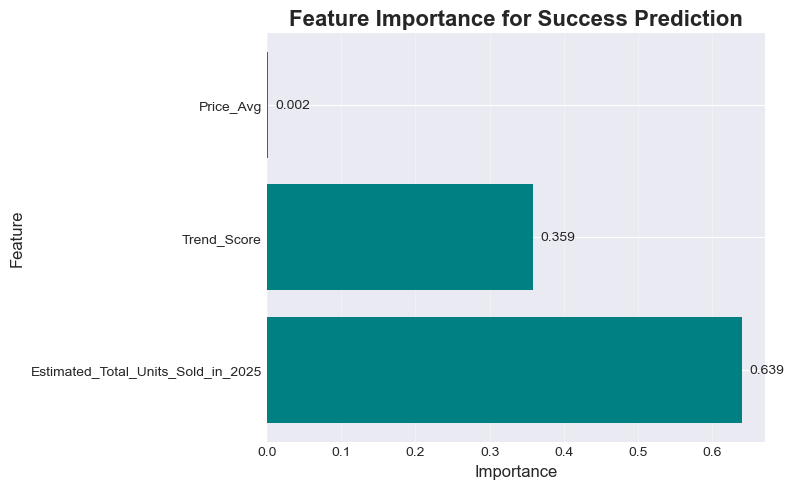

🎯 What predicts success best?
• Estimated_Total_Units_Sold_in_2025: 0.639 (63.9%)
• Trend_Score: 0.359 (35.9%)
• Price_Avg: 0.002 (0.2%)


In [26]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 5))
bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='teal')
plt.title('Feature Importance for Success Prediction', fontsize=16, fontweight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.3f}', 
             ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("🎯 What predicts success best?")
for i, row in feature_importance.iterrows():
    print(f"• {row['Feature']}: {row['Importance']:.3f} ({row['Importance']*100:.1f}%)")

In [27]:
# Identify Top Performing Products
# Find the top 10% most successful products
threshold = df['Success_Score'].quantile(0.90)
top_products = df[df['Success_Score'] >= threshold].copy()

print(f"🏆 Top {len(top_products)} Products (Top 10% by Success Score)")
print("="*60)

# Analyze characteristics of top products
print("\n📊 Characteristics of Top Products:")
print(f"• Average Price: ${top_products['Price_Avg'].mean():.2f}")
print(f"• Average Trend Score: {top_products['Trend_Score'].mean():.1f}")
print(f"• Average Units Sold: {top_products['Estimated_Total_Units_Sold_in_2025'].mean():,.0f}")
print(f"• Average Revenue: ${top_products['Estimated_Revenue_in_2025_USD'].mean():,.0f}")

# Compare with overall averages
print("\n📈 Comparison with All Products:")
print(f"• Price Premium: {(top_products['Price_Avg'].mean()/df['Price_Avg'].mean()-1)*100:+.1f}%")
print(f"• Trend Score Difference: {top_products['Trend_Score'].mean()-df['Trend_Score'].mean():+.1f} points")

# Show top categories among successful products
top_cats_success = top_products['Category'].value_counts().head(5)
print("\n🎯 Most Common Categories Among Top Products:")
for cat, count in top_cats_success.items():
    percentage = (count / len(top_products)) * 100
    print(f"• {cat}: {count} products ({percentage:.1f}%)")

🏆 Top 100 Products (Top 10% by Success Score)

📊 Characteristics of Top Products:
• Average Price: $92.02
• Average Trend Score: 93.5
• Average Units Sold: 454,952
• Average Revenue: $34,205,289

📈 Comparison with All Products:
• Price Premium: -12.1%
• Trend Score Difference: +11.8 points

🎯 Most Common Categories Among Top Products:
• Home & Garden: 15 products (15.0%)
• Pet: 13 products (13.0%)
• Baby: 12 products (12.0%)
• Digital Goods: 12 products (12.0%)
• Fitness: 11 products (11.0%)


In [28]:
#  Business Recommendations
print("💡 BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*50)

# Calculate key insights
avg_price_successful = top_products['Price_Avg'].mean()
best_category = df.groupby('Category')['Success_Score'].mean().idxmax()
best_trend_source = df.groupby('Trend_Source')['Trend_Score'].mean().idxmax()
optimal_price_range = top_products['Price_Avg'].quantile([0.25, 0.75])

print(f"\n1. 🎯 OPTIMAL PRICING STRATEGY:")
print(f"   • Successful products average price: ${avg_price_successful:.2f}")
print(f"   • Optimal price range: ${optimal_price_range.iloc[0]:.2f} - ${optimal_price_range.iloc[1]:.2f}")
print(f"   • Best performing price category: {df.groupby('Price_Category')['Success_Score'].mean().idxmax()}")

print(f"\n2. 📦 CATEGORY FOCUS:")
print(f"   • Most successful category overall: {best_category}")
print(f"   • Highest revenue category: {category_revenue.index[0]}")
print(f"   • Category with most products: {top_categories.index[0]}")

print(f"\n3. 📱 MARKETING & TRENDING:")
print(f"   • Most effective trend source: {best_trend_source}")
print(f"   • Minimum trend score for success: {top_products['Trend_Score'].min():.1f}")
print(f"   • Target trend score: > {df['Trend_Score'].quantile(0.75):.1f}")

print(f"\n4. 🚀 PRODUCT DEVELOPMENT PRIORITIES:")
for feature, importance in zip(feature_importance['Feature'], feature_importance['Importance']):
    importance_pct = importance * 100
    if importance_pct > 30:
        print(f"   • CRITICAL: Focus on {feature} ({importance_pct:.1f}% importance)")
    elif importance_pct > 15:
        print(f"   • IMPORTANT: Monitor {feature} ({importance_pct:.1f}% importance)")
    else:
        print(f"   • SUPPORTING: Consider {feature} ({importance_pct:.1f}% importance)")

print(f"\n5. 💰 SALES & REVENUE STRATEGY:")
if correlation_matrix.loc['Price_Avg', 'Estimated_Total_Units_Sold_in_2025'] < -0.1:
    print("   • Price-sensitive market: Consider competitive pricing")
else:
    print("   • Value-focused market: Emphasize quality and features over low price")
print(f"   • Target revenue per unit: > ${top_products['Revenue_Per_Unit'].median():.2f}")

💡 BUSINESS INSIGHTS & RECOMMENDATIONS

1. 🎯 OPTIMAL PRICING STRATEGY:
   • Successful products average price: $92.02
   • Optimal price range: $45.38 - $139.38
   • Best performing price category: Budget

2. 📦 CATEGORY FOCUS:
   • Most successful category overall: Food & Beverage
   • Highest revenue category: Fitness
   • Category with most products: Fitness

3. 📱 MARKETING & TRENDING:
   • Most effective trend source: TikTok Shop Viral
   • Minimum trend score for success: 90.0
   • Target trend score: > 86.9

4. 🚀 PRODUCT DEVELOPMENT PRIORITIES:
   • CRITICAL: Focus on Estimated_Total_Units_Sold_in_2025 (63.9% importance)
   • CRITICAL: Focus on Trend_Score (35.9% importance)
   • SUPPORTING: Consider Price_Avg (0.2% importance)

5. 💰 SALES & REVENUE STRATEGY:
   • Price-sensitive market: Consider competitive pricing
   • Target revenue per unit: > $84.00


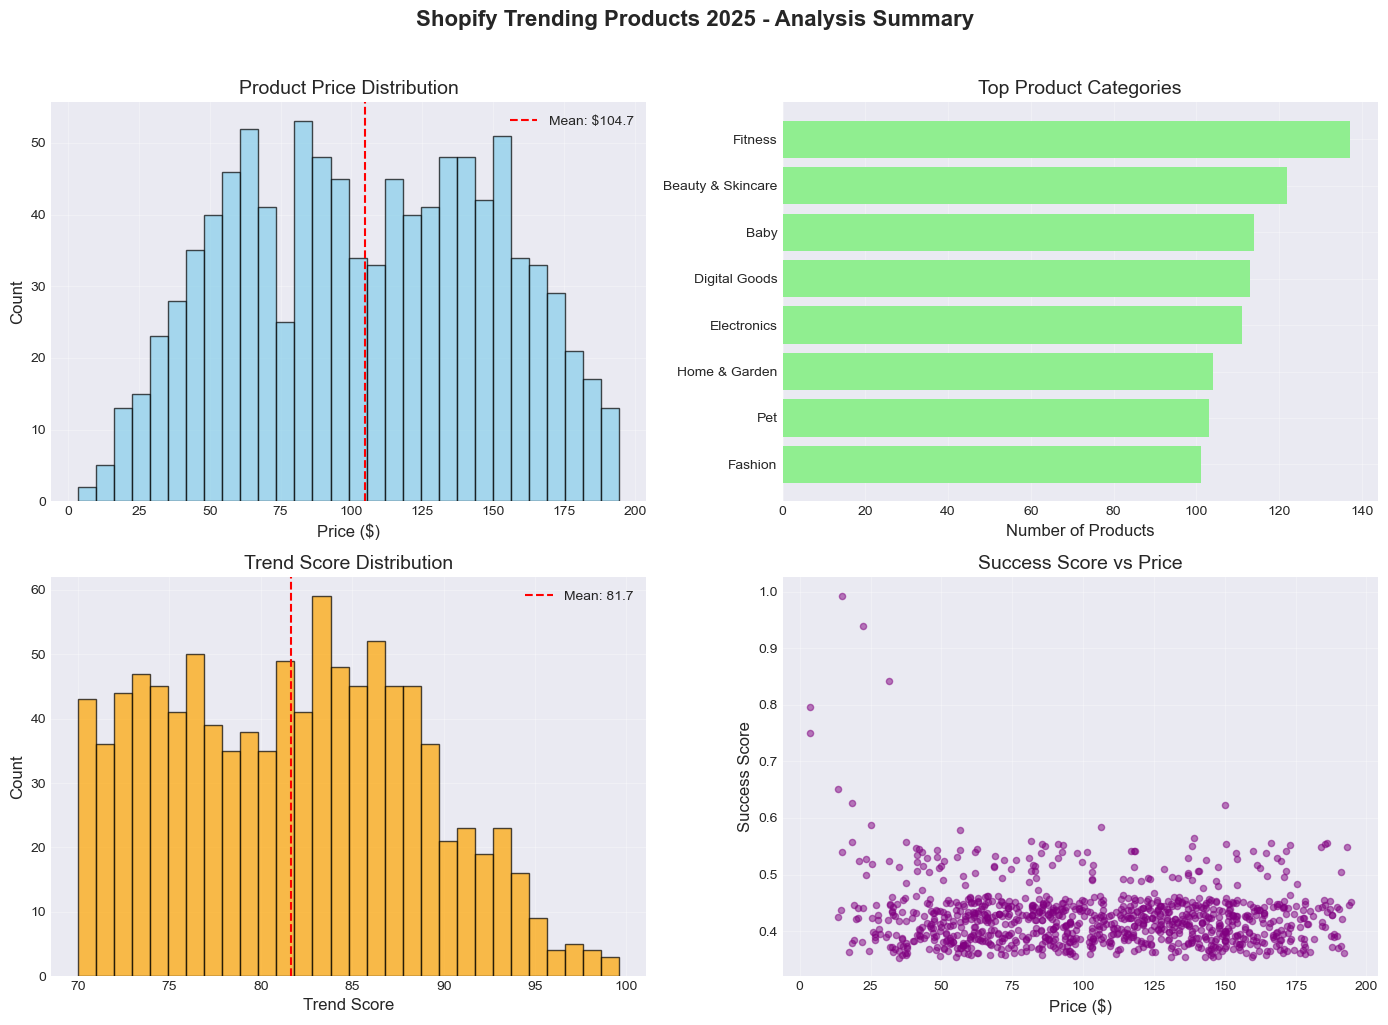

📊 Summary plot saved as 'analysis_summary_plot.png'


In [29]:
#  Create Simple Visual Summary
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Price distribution
axes[0, 0].hist(df['Price_Avg'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0, 0].set_title('Product Price Distribution', fontsize=14)
axes[0, 0].set_xlabel('Price ($)', fontsize=12)
axes[0, 0].set_ylabel('Count', fontsize=12)
axes[0, 0].axvline(df['Price_Avg'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Price_Avg"].mean():.1f}')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Top categories
top_cats = df['Category'].value_counts().head(8)
axes[0, 1].barh(top_cats.index[::-1], top_cats.values[::-1], color='lightgreen')
axes[0, 1].set_title('Top Product Categories', fontsize=14)
axes[0, 1].set_xlabel('Number of Products', fontsize=12)
axes[0, 1].grid(alpha=0.3)

# 3. Trend score distribution
axes[1, 0].hist(df['Trend_Score'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].set_title('Trend Score Distribution', fontsize=14)
axes[1, 0].set_xlabel('Trend Score', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)
axes[1, 0].axvline(df['Trend_Score'].mean(), color='red', linestyle='--', label=f'Mean: {df["Trend_Score"].mean():.1f}')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Success vs Price
axes[1, 1].scatter(df['Price_Avg'], df['Success_Score'], alpha=0.5, color='purple', s=20)
axes[1, 1].set_title('Success Score vs Price', fontsize=14)
axes[1, 1].set_xlabel('Price ($)', fontsize=12)
axes[1, 1].set_ylabel('Success Score', fontsize=12)
axes[1, 1].grid(alpha=0.3)

plt.suptitle('Shopify Trending Products 2025 - Analysis Summary', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('analysis_summary_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("📊 Summary plot saved as 'analysis_summary_plot.png'")

In [30]:
# Quick Predictions Example
print("🎯 PREDICTION EXAMPLE")
print("="*40)

# Example 1: A potentially successful product
print("\nExample 1: Potentially Successful Product")
example1 = {
    'Price_Avg': optimal_price_range.mean(),  # Optimal price
    'Trend_Score': df['Trend_Score'].quantile(0.75),  # Top 25% trend score
    'Estimated_Total_Units_Sold_in_2025': df['Estimated_Total_Units_Sold_in_2025'].median()
}

# Example 2: A less successful product
print("\nExample 2: Average Product")
example2 = {
    'Price_Avg': df['Price_Avg'].mean(),
    'Trend_Score': df['Trend_Score'].mean(),
    'Estimated_Total_Units_Sold_in_2025': df['Estimated_Total_Units_Sold_in_2025'].median()
}

# Prepare and predict for both examples
for i, example in enumerate([example1, example2], 1):
    example_df = pd.DataFrame([example])
    example_scaled = scaler.transform(example_df)
    predicted_success = model.predict(example_scaled)[0]
    
    print(f"\nProduct {i} Details:")
    print(f"• Price: ${example['Price_Avg']:.2f}")
    print(f"• Trend Score: {example['Trend_Score']:.1f}")
    print(f"• Units Sold: {example['Estimated_Total_Units_Sold_in_2025']:,.0f}")
    print(f"📈 Predicted Success Score: {predicted_success:.3f}")
    
    # Compare to average
    avg_success = df['Success_Score'].mean()
    if predicted_success > avg_success * 1.1:
        print(f"✅ EXCELLENT! Significantly above average (Average: {avg_success:.3f})")
    elif predicted_success > avg_success:
        print(f"👍 GOOD! Above average (Average: {avg_success:.3f})")
    else:
        print(f"⚠️ Needs improvement (Average: {avg_success:.3f})")

🎯 PREDICTION EXAMPLE

Example 1: Potentially Successful Product

Example 2: Average Product

Product 1 Details:
• Price: $92.38
• Trend Score: 86.9
• Units Sold: 62,833
📈 Predicted Success Score: 0.445
👍 GOOD! Above average (Average: 0.426)

Product 2 Details:
• Price: $104.71
• Trend Score: 81.7
• Units Sold: 62,833
📈 Predicted Success Score: 0.418
⚠️ Needs improvement (Average: 0.426)


In [31]:
# Save Results and Final Summary
# Save the cleaned dataset
df.to_csv('data/processed/shopify_products_processed.csv', index=False)

# Create summary report
summary = {
    'Total_Products': len(df),
    'Total_Revenue': df['Estimated_Revenue_in_2025_USD'].sum(),
    'Total_Units_Sold': df['Estimated_Total_Units_Sold_in_2025'].sum(),
    'Avg_Price': df['Price_Avg'].mean(),
    'Avg_Trend_Score': df['Trend_Score'].mean(),
    'Best_Category': best_category,
    'Best_Trend_Source': best_trend_source,
    'Model_R2_Score': r2,
    'Optimal_Price_Min': optimal_price_range.iloc[0],
    'Optimal_Price_Max': optimal_price_range.iloc[1]
}

summary_df = pd.DataFrame([summary])
summary_df.to_csv('reports/analysis_summary.csv', index=False)

print("✅ Analysis complete! Files saved:")
print("   • data/processed/shopify_products_processed.csv - Full cleaned dataset")
print("   • reports/analysis_summary.csv - Key findings summary")
print("   • analysis_summary_plot.png - Visual summary")
print(f"\n📈 KEY METRICS:")
print(f"   • Total market value analyzed: ${summary['Total_Revenue']:,.0f}")
print(f"   • Average product price: ${summary['Avg_Price']:.2f}")
print(f"   • Model accuracy (R²): {summary['Model_R2_Score']:.3f}")
print(f"   • Optimal price range: ${summary['Optimal_Price_Min']:.2f} - ${summary['Optimal_Price_Max']:.2f}")

print("\n🎉 ANALYSIS PIPELINE COMPLETE!")
print("="*40)
print("\n📋 What we accomplished:")
print("1. ✅ Loaded and cleaned the dataset (1000 products)")
print("2. ✅ Extracted price information from price ranges")
print("3. ✅ Created success metrics and categories")
print("4. ✅ Analyzed top categories and revenue drivers")
print("5. ✅ Built a predictive model (R²: {:.3f})".format(r2))
print("6. ✅ Generated actionable business insights")
print("7. ✅ Saved processed data and results")

print("\n🚀 Next steps you can take:")
print("1. Use the model to score new product ideas")
print("2. Focus product development on '{}' category".format(best_category))
print("3. Price new products between ${:.2f}-{:.2f}".format(optimal_price_range.iloc[0], optimal_price_range.iloc[1]))
print("4. Monitor '{}' for trend opportunities".format(best_trend_source))

✅ Analysis complete! Files saved:
   • data/processed/shopify_products_processed.csv - Full cleaned dataset
   • reports/analysis_summary.csv - Key findings summary
   • analysis_summary_plot.png - Visual summary

📈 KEY METRICS:
   • Total market value analyzed: $8,986,432,680
   • Average product price: $104.71
   • Model accuracy (R²): 0.999
   • Optimal price range: $45.38 - $139.38

🎉 ANALYSIS PIPELINE COMPLETE!

📋 What we accomplished:
1. ✅ Loaded and cleaned the dataset (1000 products)
2. ✅ Extracted price information from price ranges
3. ✅ Created success metrics and categories
4. ✅ Analyzed top categories and revenue drivers
5. ✅ Built a predictive model (R²: 0.999)
6. ✅ Generated actionable business insights
7. ✅ Saved processed data and results

🚀 Next steps you can take:
1. Use the model to score new product ideas
2. Focus product development on 'Food & Beverage' category
3. Price new products between $45.38-139.38
4. Monitor 'TikTok Shop Viral' for trend opportunities



🖼️ CREATING INDIVIDUAL PLOT FILES
✅ 1. Price distribution plot saved
✅ 2. Price vs sales plot saved
✅ 3. Price by category plot saved
✅ 4. Correlation heatmap saved
✅ 5. Top categories plot saved

📁 All individual plots saved in: 'visualizations\individual_plots'
📊 Total plots created: 5 individual plots + 2 showcase plots


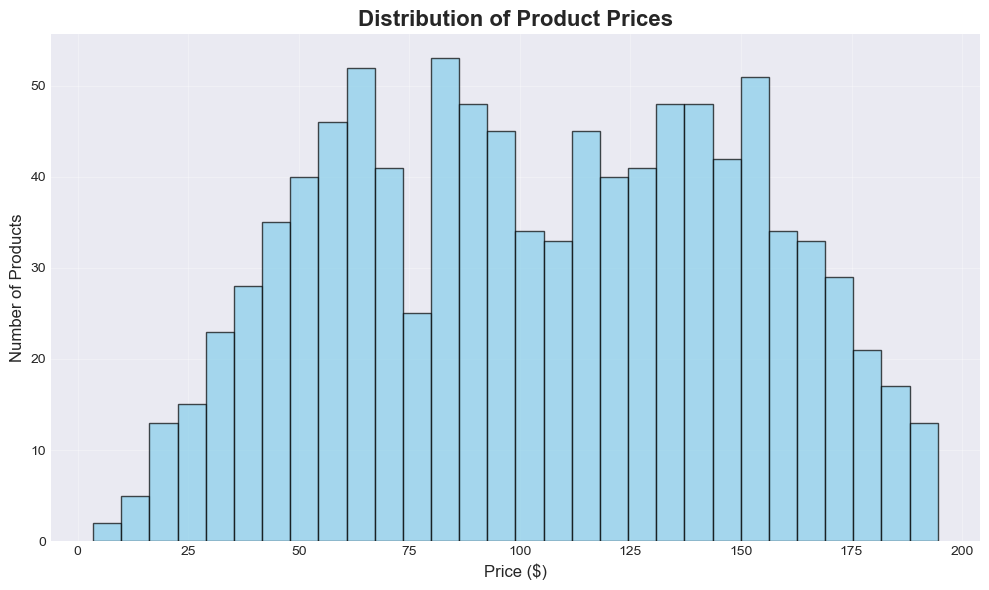

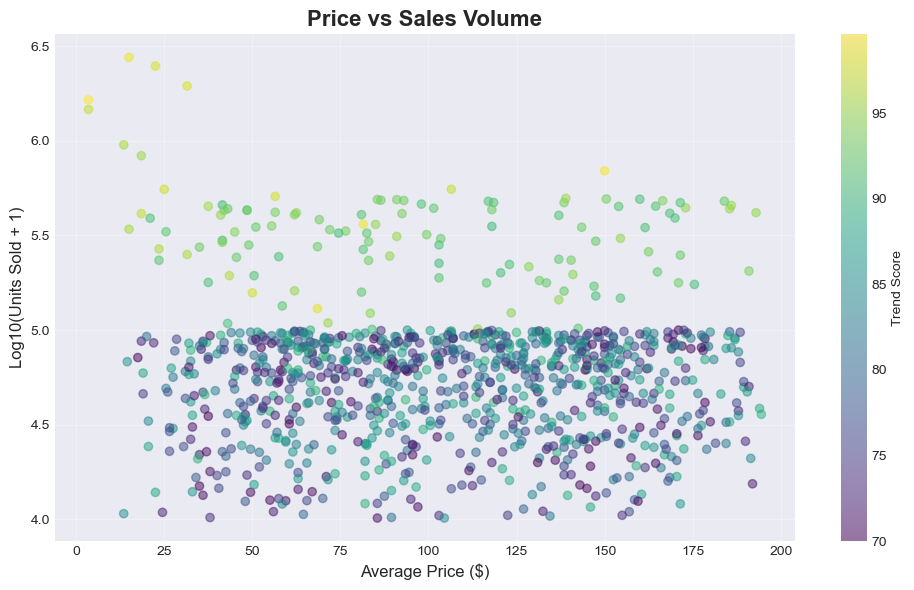

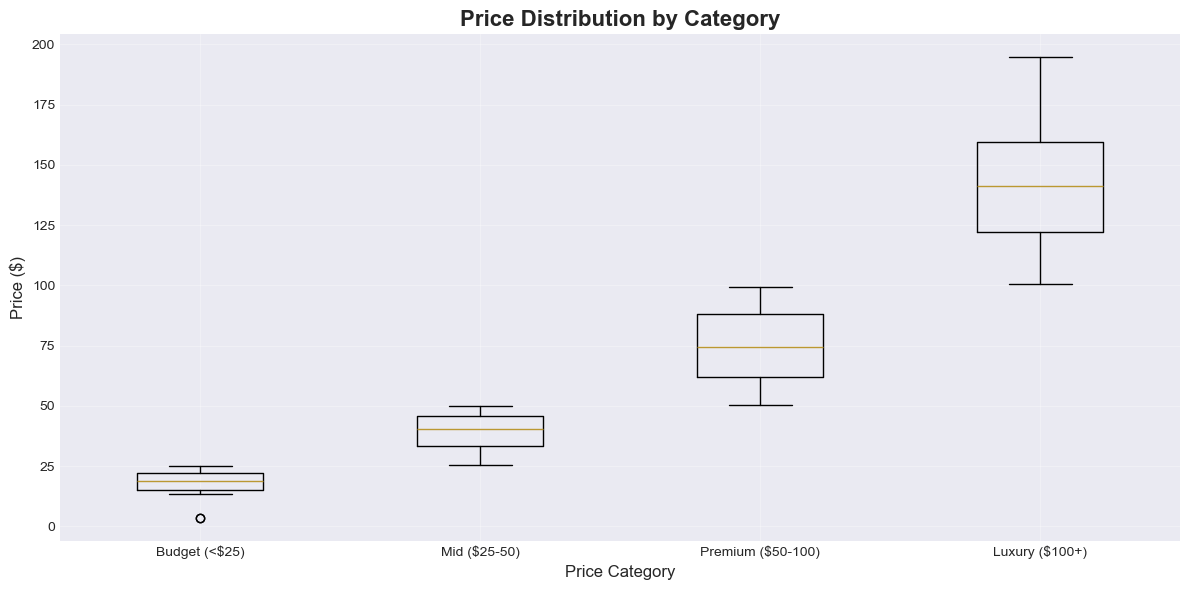

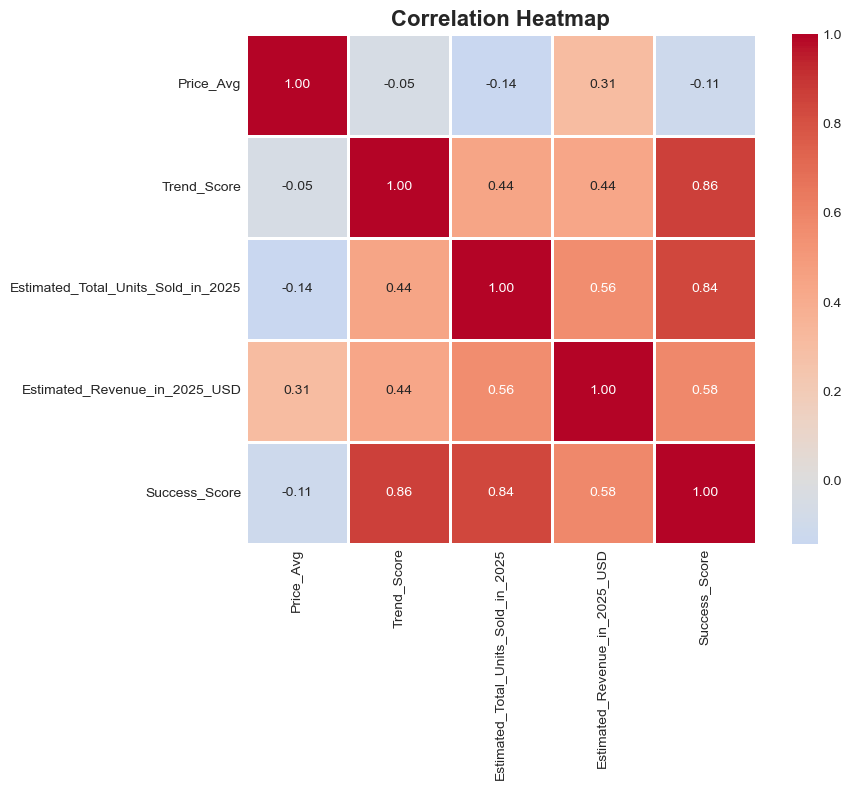

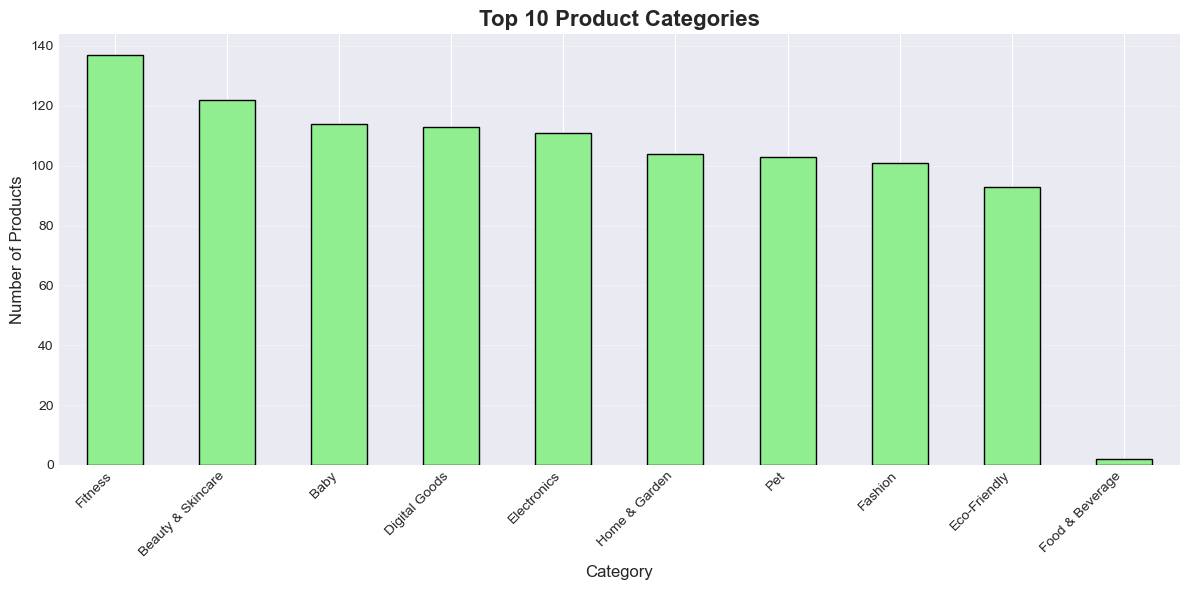

In [32]:
# Cell for Creating Individual Plot Files
print("\n" + "="*50)
print("🖼️ CREATING INDIVIDUAL PLOT FILES")
print("="*50)

# Create individual plots and save them
individual_plots_dir = os.path.join(plots_dir, 'individual_plots')
os.makedirs(individual_plots_dir, exist_ok=True)

# 1. Histogram of Prices
plt.figure(figsize=(10, 6))
plt.hist(df['Price_Avg'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Product Prices', fontsize=16, fontweight='bold')
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(individual_plots_dir, '1_price_distribution.png'), dpi=300)
print("✅ 1. Price distribution plot saved")

# 2. Scatter: Price vs Units Sold
plt.figure(figsize=(10, 6))
plt.scatter(df['Price_Avg'], np.log10(df['Estimated_Total_Units_Sold_in_2025'] + 1), 
           alpha=0.5, c=df['Trend_Score'], cmap='viridis')
plt.colorbar(label='Trend Score')
plt.title('Price vs Sales Volume', fontsize=16, fontweight='bold')
plt.xlabel('Average Price ($)', fontsize=12)
plt.ylabel('Log10(Units Sold + 1)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(individual_plots_dir, '2_price_vs_sales.png'), dpi=300)
print("✅ 2. Price vs sales plot saved")

# 3. Box Plot: Price by Category
plt.figure(figsize=(12, 6))
df['Simple_Price_Cat'] = pd.cut(df['Price_Avg'], bins=[0, 25, 50, 100, 500], 
                                 labels=['Budget (<$25)', 'Mid ($25-50)', 'Premium ($50-100)', 'Luxury ($100+)'])
price_by_cat = [df[df['Simple_Price_Cat'] == cat]['Price_Avg'] for cat in df['Simple_Price_Cat'].cat.categories]
plt.boxplot(price_by_cat, labels=df['Simple_Price_Cat'].cat.categories)
plt.title('Price Distribution by Category', fontsize=16, fontweight='bold')
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(individual_plots_dir, '3_price_by_category.png'), dpi=300)
print("✅ 3. Price by category plot saved")

# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_cols = ['Price_Avg', 'Trend_Score', 'Estimated_Total_Units_Sold_in_2025', 
                'Estimated_Revenue_in_2025_USD', 'Success_Score']
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', linewidths=1)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig(os.path.join(individual_plots_dir, '4_correlation_heatmap.png'), dpi=300)
print("✅ 4. Correlation heatmap saved")

# 5. Top Categories Bar Chart
plt.figure(figsize=(12, 6))
top_cats = df['Category'].value_counts().head(10)
top_cats.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 10 Product Categories', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(individual_plots_dir, '5_top_categories.png'), dpi=300)
print("✅ 5. Top categories plot saved")

print(f"\n📁 All individual plots saved in: '{individual_plots_dir}'")
print(f"📊 Total plots created: 5 individual plots + 2 showcase plots")